#**California Housing Price**
---


---




 ### **Contents:**
 Data Source: [Link](https://drive.google.com/file/d/1PGLl2kmI17BVQtpxFBmmVTSFABSAIZA9/view?usp=sharing)
1. Context Understanding & Problem Statement
2. Data Cleaning & Preparation
3. Exploratory data Analysis
4. Modeling
5. Conclusion and Recommendation

---



##**1. Context Understanding**

Dataset yang akan diolah di bawah ini, merupakan hasil sensus di California pada **Tahun 1990** dengan 20,640 sampel data yang merepresentasikan berbagai district di California yang terdiri dari informasi mengenai geografis (*longitude, latitude*), karakteristik properti (*housing_median_age, total_rooms, total_bedrooms*), informasi demografis (*population, households, median_income*), kedekatan dengan laut (*ocean_proximity*), dan target variabel berupa median_house_value. Meskipun suadh terlampau puluhan tahun pola hubungan antar variabel dan faktor-faktor yang mempengaruhi harga rumah tetap memiliki relevansi untuk prediksi harga properti.







###**Problem Statement**

Sektor perusahaan *Real Estate*, investor properti, dan perencana kota menghadapi tantangan dalam menentukan harga rumah yang akurat berdasarkan karakteristik lokasi dan properti, dimana proses valuasi manual yang dilakukan saat ini membutuhkan waktu lama dan seringkali menghasilkan estimasi yang tidak konsisten. Permasalahan ini sangat penting untuk diselesaikan karena ketidakakuratan dalam penentuan harga properti dapat menyebabkan kerugian finansial bagi investor, menghambat efisiensi proses jual-beli properti, dan mempersulit perencana kota dalam membuat kebijakan tata ruang yang tepat sasaran. Meskipun data berasal dari tahun 1990, pola hubungan antar variabel dan faktor-faktor yang mempengaruhi harga rumah tetap relevan untuk dipelajari sebagai foundation dalam membangun model machine learning untuk prediksi harga properti.



***Analytics and Metrics***

Proses analisis dimulai dengan exploratory data analysis untuk memahami pola dan distribusi data, dilanjutkan dengan feature engineering untuk menciptakan variabel baru yang lebih meaningful seperti rooms_per_household dan population_density, kemudian preprocessing data untuk menangani missing values dan outliers, serta perbandingan multiple algoritma seperti Linear Regression, Random Forest, dan XGBoost untuk menemukan model terbaik.

Evaluasi model akan menggunakan empat metrics utama yaitu **MAE** (Mean Absolute Error) untuk interpretasi langsung dalam satuan dollar yang mudah dipahami stakeholder, **RMSE** (Root Mean Square Error) untuk mendeteksi konsistensi prediksi dengan memberikan penalty lebih besar pada error ekstrem, **MAPE** (Mean Absolute Percentage Error) untuk memahami persentase kesalahan yang scale-independent dan business-friendly, serta ***R-squared*** untuk mengukur kemampuan model dalam menjelaskan variance data.


---



##**2. Data Preparation & Cleaning**

### **Preparation**

In [1]:
# Data Preparation - Importing Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)

In [2]:
# Data Preparation - Display

df = pd.read_csv("data_california_house.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


###**Cleaning**

Sebelum mengeksplor data lebih dalam, kita telah melakukan proses *data cleaning* untuk memastikan kualitas data. Langkah-langkah ini meliputi analisis dan imputasi nilai yang hilang, pemeriksaan duplikat, serta deteksi dan penanganan outliers pada kolom-kolom numerik penting dengan metode capping menggunakan IQR, sehingga data menjadi lebih siap untuk analisis dan modeling lanjutan.

In [3]:
# Data Cleaning - Missing Values Analysis

print(f"\n- MISSING VALUES ANALYSIS -")
missing_info = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2),
    'Data Type': df.dtypes
})
print(missing_info)


- MISSING VALUES ANALYSIS -
                                Column  Missing Count  Missing % Data Type
longitude                    longitude              0       0.00   float64
latitude                      latitude              0       0.00   float64
housing_median_age  housing_median_age              0       0.00   float64
total_rooms                total_rooms              0       0.00   float64
total_bedrooms          total_bedrooms            137       0.95   float64
population                  population              0       0.00   float64
households                  households              0       0.00   float64
median_income            median_income              0       0.00   float64
ocean_proximity        ocean_proximity              0       0.00    object
median_house_value  median_house_value              0       0.00   float64


In [4]:
# Data Cleaning - Impute missing values in 'total_bedrooms' with the median

median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_bedrooms)

print(f"\n- MISSING VALUES ANALYSIS AFTER IMPUTATION -")
missing_info_after_imputation = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df) * 100).round(2),
    'Data Type': df.dtypes
})
print(missing_info_after_imputation)


- MISSING VALUES ANALYSIS AFTER IMPUTATION -
                                Column  Missing Count  Missing % Data Type
longitude                    longitude              0        0.0   float64
latitude                      latitude              0        0.0   float64
housing_median_age  housing_median_age              0        0.0   float64
total_rooms                total_rooms              0        0.0   float64
total_bedrooms          total_bedrooms              0        0.0   float64
population                  population              0        0.0   float64
households                  households              0        0.0   float64
median_income            median_income              0        0.0   float64
ocean_proximity        ocean_proximity              0        0.0    object
median_house_value  median_house_value              0        0.0   float64


In [5]:
# Data Cleaning - Duplicates Check

print(f"\n- DUPLICATE CHECK -")
print(f"Duplicate rows: {df.duplicated().sum()}")


- DUPLICATE CHECK -
Duplicate rows: 0


In [6]:
# Data Cleaning - Outliers Detection

print(f"\nOUTLIERS DETECTION: ")
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


OUTLIERS DETECTION: 
longitude: 0 outliers (0.00%)
latitude: 0 outliers (0.00%)
housing_median_age: 0 outliers (0.00%)
total_rooms: 900 outliers (6.23%)
total_bedrooms: 888 outliers (6.15%)
population: 827 outliers (5.72%)
households: 842 outliers (5.83%)
median_income: 482 outliers (3.34%)
median_house_value: 757 outliers (5.24%)


In [7]:
# Data Cleaning - Handle Outliers by Capping

numerical_cols_with_outliers = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

for col in numerical_cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Verify outliers after capping
print(f"\nOUTLIERS DETECTION AFTER CAPPING: ")
for col in numerical_cols_with_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


OUTLIERS DETECTION AFTER CAPPING: 
total_rooms: 0 outliers (0.00%)
total_bedrooms: 0 outliers (0.00%)
population: 0 outliers (0.00%)
households: 0 outliers (0.00%)
median_income: 0 outliers (0.00%)
median_house_value: 0 outliers (0.00%)


## **3. Exploratory Data Analysis**

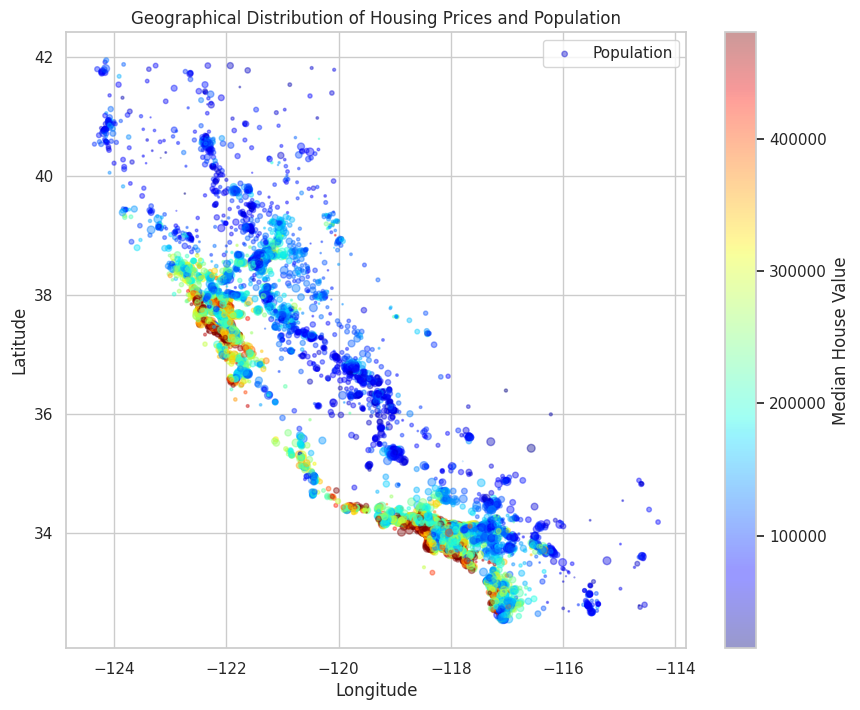

In [8]:
# Exploratory Data Analysis - Latitude vs. longitude colored by median_house_value

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['longitude'], df['latitude'], alpha=0.4,
                      c=df['median_house_value'], cmap=plt.get_cmap('jet'),
                      s=df['population']/100, label='Population')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Housing Prices and Population')
plt.colorbar(scatter, label='Median House Value')
plt.legend()
plt.show()

Visualisasi sebaran geografis di atas menunjukkan bahwa area dengan warna yang lebih terang (seperti kuning atau merah) memiliki nilai median rumah yang lebih tinggi, sedangkan area dengan warna yang lebih gelap (seperti biru atau ungu) menunjukkan nilai median rumah yang lebih rendah. Adanya pola spasial dimana distrik perumahan terkonsentrasi di area bujur -118 hingga -120 yang mengindikasikan variasi nilai median rumah umumnya memiliki harga yang lebih tinggi.

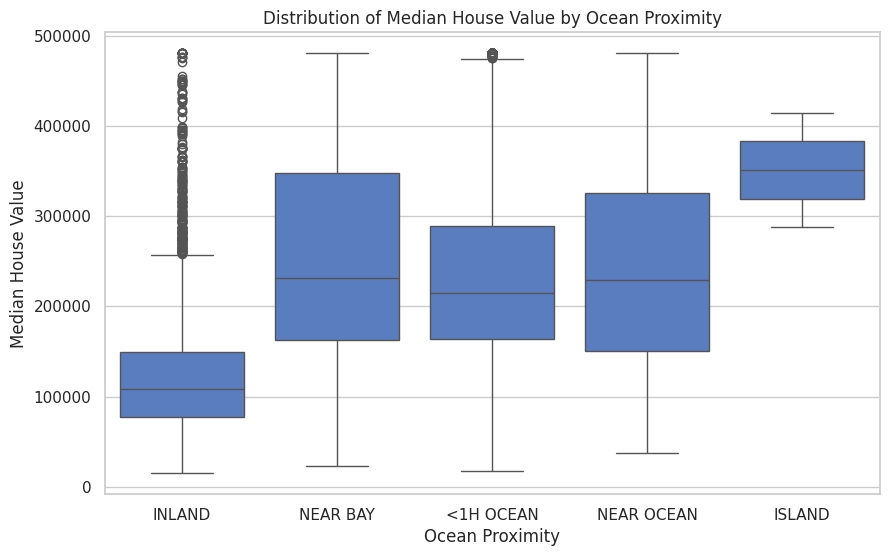

In [9]:
# Exploratory Data Analysis - Box Plot of Median House Value by Ocean Proximity

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')
plt.title('Distribution of Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

Lokasi di `<1H OCEAN` dan `NEAR BAY` secara menunjukkan median harga yang substansial lebih tinggi dibandingkan dengan `INLAND` dan `NEAR OCEAN`. Variasi harga dalam kategori juga dapat diamati dari rentang interkuartil. Temuan ini secara empiris menyatakan bahwa kedekatan geografis dengan laut merupakan prediktor kuat terhadap nilai properti

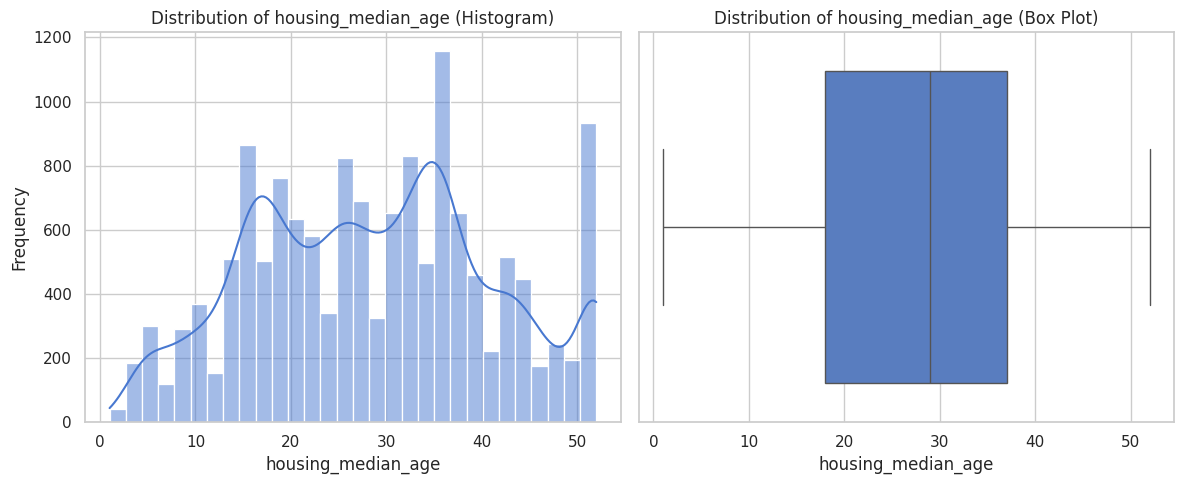

In [10]:
# Exploratory Data Analysis - Housing median age

col = 'housing_median_age'
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data=df, x=col, bins=30, kde=True)
plt.title(f'Distribution of {col} (Histogram)')
plt.xlabel(col)
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x=col)
plt.title(f'Distribution of {col} (Box Plot)')
plt.xlabel(col)

plt.tight_layout()
plt.show()

Pada table *Histogram* menunjukkan adanya puncak frekuensi distrik pada usia median sekitar 15-20 tahun dan juga mendekati 50 tahun, dengan distribusi yang cenderung skewed ke kanan, menandakan banyak distrik dengan perumahan yang lebih tua.

Sementara table *Box plot* melengkapi gambaran ini dengan merangkum statistik utama dan sebaran data: garis tengah menunjukkan median usia perumahan, kotak (box) mencakup 50% data di antara kuartil pertama (Q1) dan kuartil ketiga (Q3), dan "whiskers" menunjukkan rentang data yang wajar.

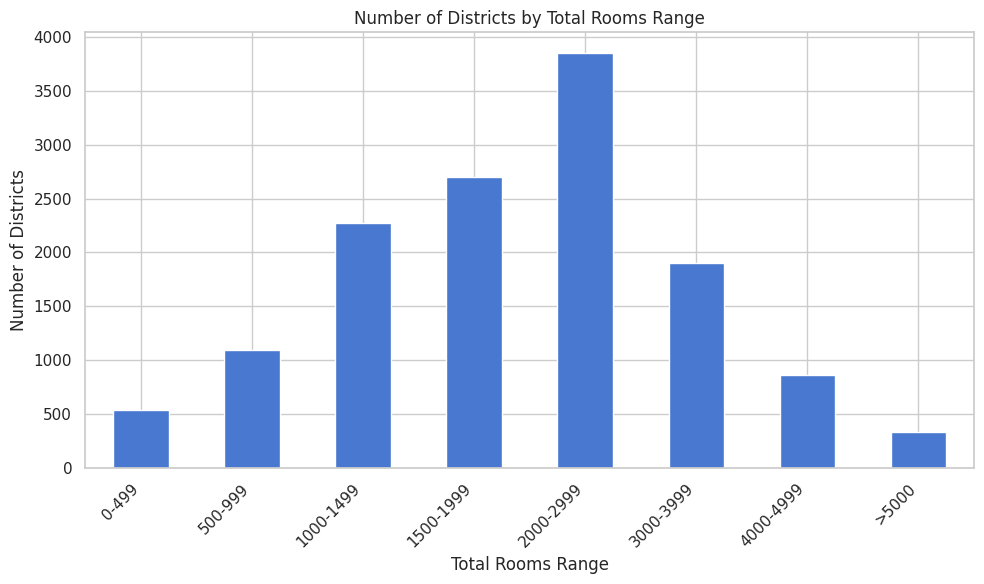

In [11]:
# Exploratory Data Analysis - Total rooms

bins = [0, 500, 1000, 1500, 2000, 3000, 4000, 5000, df['total_rooms'].max()]
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-2)] + [f'>{bins[-2]}']

df['total_rooms_binned'] = pd.cut(df['total_rooms'], bins=bins, labels=labels, right=False)

binned_counts = df['total_rooms_binned'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
binned_counts.plot(kind='bar')
plt.title('Number of Districts by Total Rooms Range')
plt.xlabel('Total Rooms Range')
plt.ylabel('Number of Districts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df = df.drop('total_rooms_binned', axis=1)

Dari chart ini, kita bisa dengan mudah melihat bahwa sebagian besar distrik memiliki jumlah ruangan dalam rentang **1000 hingga 3000**. Jumlah distrik menurun signifikan untuk rentang jumlah ruangan yang lebih besar. Ini mengkonfirmasi bahwa properti dengan jumlah ruangan yang sangat banyak (di atas 4000 atau 5000) lebih jarang ditemukan dibandingkan properti dengan jumlah ruangan yang lebih standar.

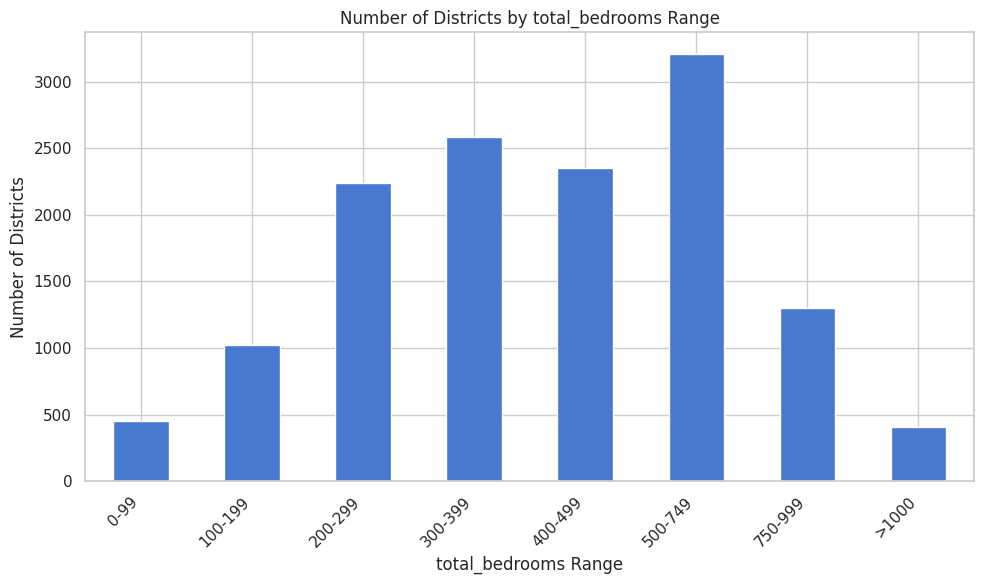

In [12]:
# Exploratory Data Analysis - Total Bedrooms

col = 'total_bedrooms'

bins = [0, 100, 200, 300, 400, 500, 750, 1000]
max_val = df[col].max()
if max_val > bins[-1]:
    bins.append(max_val)
elif max_val < bins[-1] and max_val > bins[-2]:
     bins[-1] = max_val
elif max_val <= bins[-2]:
     while len(bins) > 1 and max_val <= bins[-2]:
         bins.pop()
     if max_val > bins[-1]:
         bins.append(max_val)
     elif max_val < bins[-1] and max_val > bins[-2] if len(bins) > 1 else True:
         bins[-1] = max_val
     elif max_val <= bins[-1] and len(bins) == 1:
         bins.append(max_val)


labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-2)] + [f'>{bins[-2]}'] if len(bins) > 2 else [f'{bins[0]}-{bins[-1]-1}'] if len(bins) == 2 else [f'< {bins[0]}'] if len(bins) == 1 else []

df[f'{col}_binned'] = pd.cut(df[col], bins=bins, labels=labels, right=False, include_lowest=True)

binned_counts = df[f'{col}_binned'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
binned_counts.plot(kind='bar')
plt.title(f'Number of Districts by {col} Range')
plt.xlabel(f'{col} Range')
plt.ylabel('Number of Districts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df = df.drop(f'{col}_binned', axis=1)

Visualisasi bar chart ini menampilkan distribusi jumlah kamar tidur per distrik, dikelompokkan ke dalam rentang yang jelas untuk memudahkan pemahaman. Setiap batang menunjukkan jumlah distrik dalam rentang jumlah kamar tidur tertentu. Terlihat bahwa konsentrasi distrik terbesar berada pada rentang jumlah kamar tidur antara **200 hingga 500**. Frekuensi distrik menurun secara signifikan di luar rentang ini, menunjukkan bahwa properti dengan jumlah kamar tidur di kisaran tersebut adalah yang paling umum

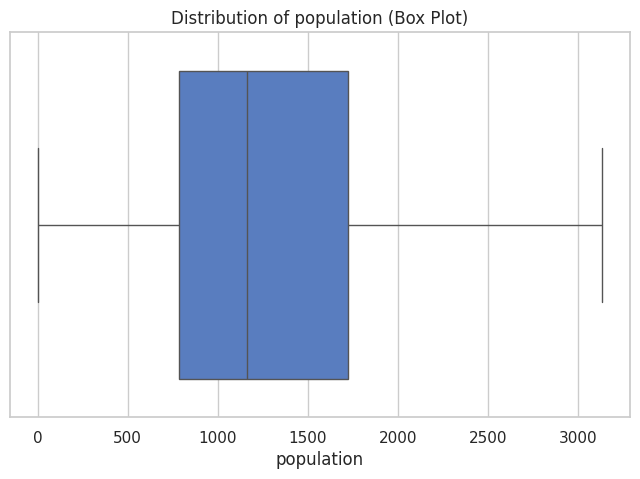

In [13]:
# Exploratory Data Analysis - Population

col = 'population'
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x=col)
plt.title(f'Distribution of {col} (Box Plot)')
plt.xlabel(col)
plt.show()

In [14]:
# Exploratory Data Analysis - Population - Quartile

population_q1 = df['population'].quantile(0.25)
population_median = df['population'].median()
population_q3 = df['population'].quantile(0.75)

quartile_data = {
    'Statistic': ['Population Q1 (25th percentile)', 'Population Median (50th percentile)',
                  'Population Q3 (75th percentile)'],
    'Value': [population_q1, population_median, population_q3]
}

quartile_df = pd.DataFrame(quartile_data)

display(quartile_df.style.hide(axis="index").format({'Value': '{:.0f}'}))

Statistic,Value
Population Q1 (25th percentile),784
Population Median (50th percentile),1165
Population Q3 (75th percentile),1724


Visualisasi box plot `population` dan nilai kuartilnya secara kritis menunjukkan bahwa **distribusi populasi per distrik condong *right-skewed* dan didominasi oleh distrik berpopulasi rendah** dengan median populasi yang hanya sekitar 1165 jiwa (Kuartil ke-2) dan Kuartil Pertama (Q1) di sekitar 784 jiwa menegaskan bahwa setidaknya 50% distrik memiliki populasi di bawah 1165 dan 25% di bawah 784 jiwa. Kotak box plot yang terkonsentrasi pada nilai rendah merepresentasikan 50% data tengah (antara Q1 dan Q3, sekitar 784 hingga 1724 jiwa)

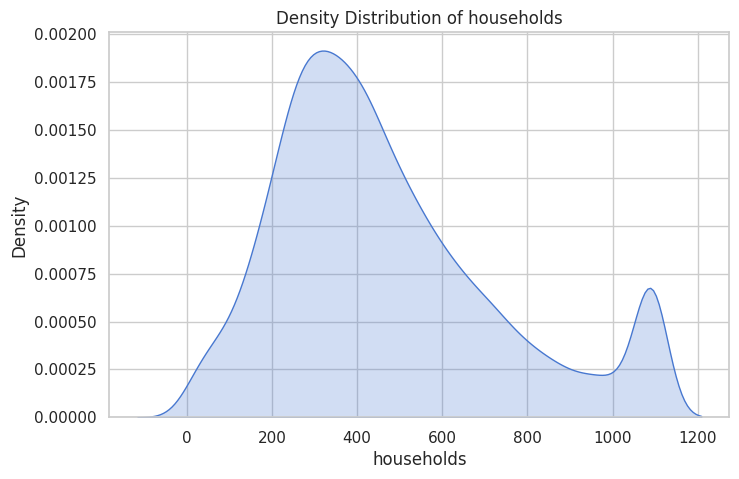

In [15]:
# Exploratory Data Analysis - Households

col = 'households'
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x=col, fill=True)
plt.title(f'Density Distribution of {col}')
plt.xlabel(col)
plt.ylabel('Density')
plt.show()

In [16]:
# Exploratory Data Analysis - Households - Quartile

households_q1 = df['households'].quantile(0.25)
households_median = df['households'].median()
households_q3 = df['households'].quantile(0.75)

quartile_data = {
    'Statistic': ['Households Q1 (25th percentile)',
                  'Households Median (50th percentile)', 'Households Q3 (75th percentile)'],
    'Value': [households_q1, households_median, households_q3]
}

quartile_df = pd.DataFrame(quartile_data)

display(quartile_df.style.hide(axis="index").format({'Value': '{:.0f}'}))

Statistic,Value
Households Q1 (25th percentile),279
Households Median (50th percentile),410
Households Q3 (75th percentile),604


Density plot di atas menunjukkan puncak kepadatan yang tajam pada nilai rendah, secara kritis mengindikasikan dominasi distrik dengan jumlah rumah tangga yang sedikit. Hal ini diperkuat oleh data kuartil: **Median Households sekitar 410**, **Q1 sekitar 279**, dan **Q3 sekitar 604**, menunjukkan bahwa 50% distrik memiliki kurang dari 410 rumah tangga dan 75% memiliki kurang dari 604 rumah tangga, dengan sebagian besar data terkonsentrasi di bawah nilai median.

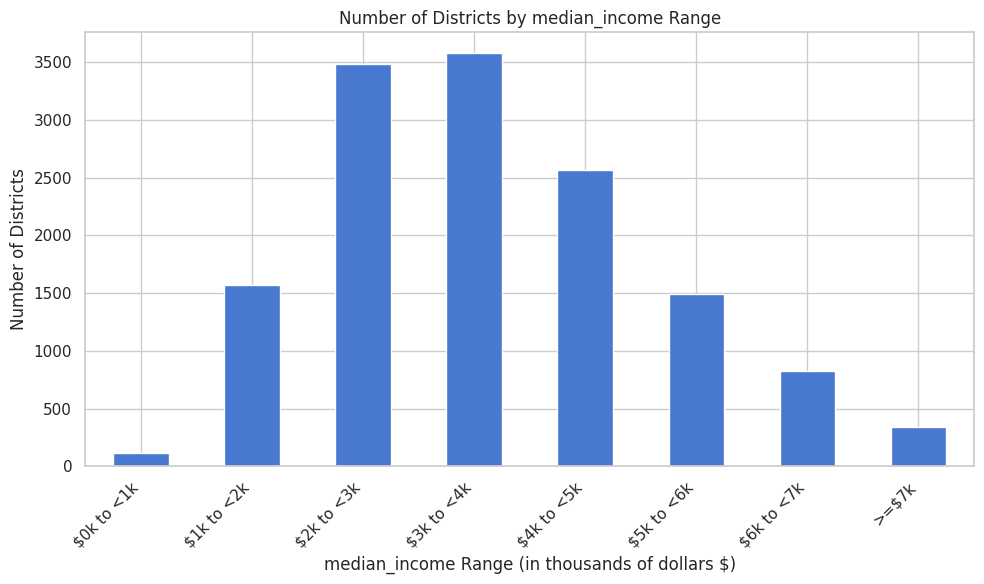

In [17]:
# Exploratory Data Analysis - Median Income

col = 'median_income'

bins = [0, 1, 2, 3, 4, 5, 6, 7, df[col].max()]

labels = [f'${bins[i]}k to <{bins[i+1]}k' for i in range(len(bins)-2)] + [f'>=${bins[-2]}k']

df[f'{col}_binned'] = pd.cut(df[col], bins=bins, labels=labels, right=False, include_lowest=True)

binned_counts = df[f'{col}_binned'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
binned_counts.plot(kind='bar')
plt.title(f'Number of Districts by {col} Range')

plt.xlabel(f'{col} Range (in thousands of dollars $)')
plt.ylabel('Number of Districts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df = df.drop(f'{col}_binned', axis=1)

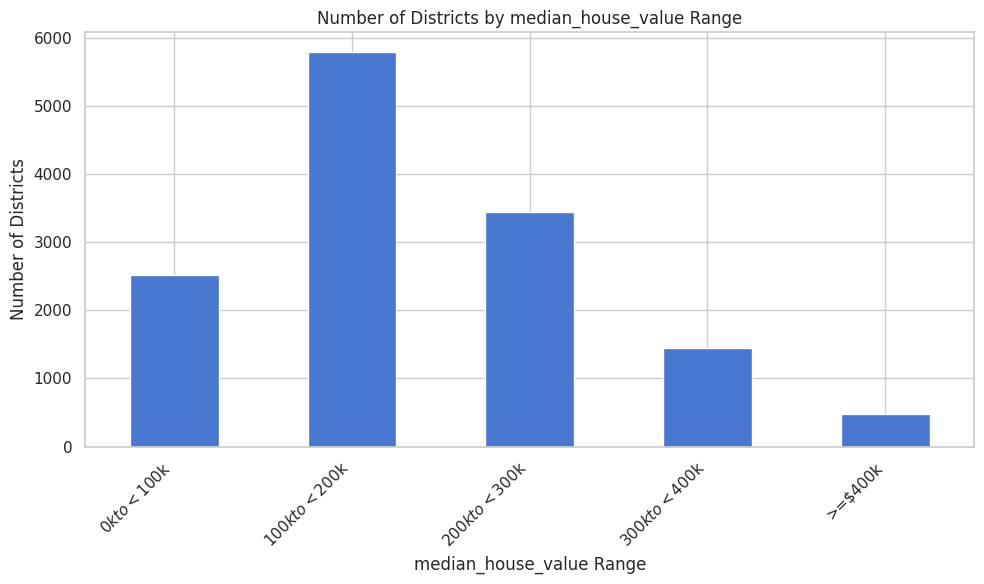

In [18]:
# Exploratory Data Analysis - Median House Value

col = 'median_house_value'

bins = [0, 100000, 200000, 300000, 400000, 500000]

max_val = df[col].max()
if max_val > bins[-1]:
    bins.append(max_val)
elif max_val < bins[-1] and max_val > bins[-2]:
     bins[-1] = max_val
elif max_val <= bins[-2]:
     while len(bins) > 1 and max_val <= bins[-2]:
         bins.pop()
     if max_val > bins[-1]:
         bins.append(max_val)
     elif max_val < bins[-1] and max_val > bins[-2] if len(bins) > 1 else True:
         bins[-1] = max_val
     elif max_val <= bins[-1] and len(bins) == 1:
         bins.append(max_val)

labels = []
if len(bins) > 1:
    for i in range(len(bins) - 1):
        lower = bins[i]
        upper = bins[i+1]
        if i < len(bins) - 2:
            labels.append(f'${int(lower/1000)}k to <${int(upper/1000)}k')
        else:
             if len(bins) > 2:
                 labels.append(f'>=${int(lower/1000)}k')
             else:
                 labels.append(f'${int(lower/1000)}k to <${int(upper/1000)}k')
elif len(bins) == 1:

     labels.append(f'< ${int(bins[0]/1000)}k')

if len(labels) != len(bins) - 1:
    print(f"Warning: Number of labels ({len(labels)}) does not match number of bins - 1 ({len(bins)-1}). Adjusting labels.")

    labels = [f'Bin {j+1}' for j in range(len(bins)-1)]

df[f'{col}_binned'] = pd.cut(df[col], bins=bins, labels=labels, right=False, include_lowest=True)

binned_counts = df[f'{col}_binned'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
binned_counts.plot(kind='bar')
plt.title(f'Number of Districts by {col} Range')
plt.xlabel(f'{col} Range')
plt.ylabel('Number of Districts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

df = df.drop(f'{col}_binned', axis=1)

Dari chart ini, kita bisa dengan mudah melihat bahwa konsentrasi distrik terbesar berada pada rentang harga rumah antara **USD 100K hingga <USD 200K**. Jumlah distrik menurun signifikan pada rentang harga yang lebih rendah (di bawah USD 100k) maupun yang lebih tinggi (di atas USD 200k). Terdapat juga sejumlah distrik pada rentang harga yang lebih tinggi (USD 300k hingga < USD 400k dan >= USD 400k), meskipun jumlahnya lebih sedikit dibandingkan rentang **USD 100k- USD 200k**.


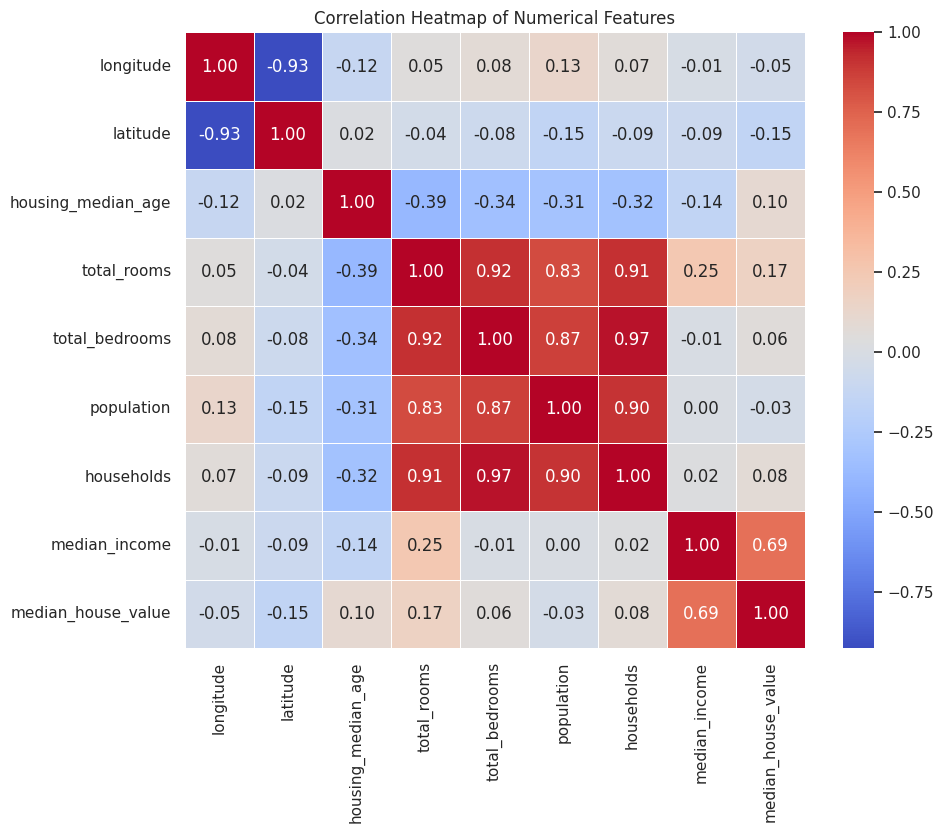

In [19]:
# Exploratory Data Analysis - Correlation

numerical_df = df.select_dtypes(include=[np.number])

corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Melihat angka korelasi dengan `median_house_value` (harga rumah), kita tahu bahwa **pendapatan (`median_income`) punya hubungan positif terkuat** (angka 0.69), artinya pendapatan tinggi berkorelasi kuat dengan harga rumah tinggi, sebuah 'petunjuk' penting yang akan dipelajari model machine learning untuk prediksi harga otomatis yang lebih akurat serta adanya angka korelasi yang sangat tinggi (di atas 0.8) antara `total_rooms`, `total_bedrooms`, `population`, dan `households`.


---



## **4. Modeling**

In [20]:
# Modeling - Target Definition

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]


Langkah pertama dalam pemodelan *machine learning* adalah dengan jelas mendefinisikan variabel mana yang akan menjadi **fitur (independent variables)** dan variabel mana yang menjadi **target (dependent variable)**. Dalam kasus ini, tujuan kita adalah memprediksi harga rumah, sehingga:

*   **Variabel Target (`y`):** Kolom `median_house_value` adalah variabel yang ingin kita prediksi.
*   **Variabel Fitur (`X`):** Semua kolom lainnya dalam dataset akan digunakan sebagai fitur atau input untuk model dalam memprediksi `median_house_value`.

Kode ini membuat dua variabel baru, `X` yang berisi DataFrame fitur (dengan menghapus kolom target) dan `y` yang berisi Series variabel target. Pemisahan ini penting untuk mempersiapkan data sesuai format yang dibutuhkan oleh algoritma machine learning.

In [21]:
# Modeling - Importing Library

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [22]:
# Modeling - Splitting

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Setelah mendefinisikan fitur (`X`) dan target (`y`), langkah selanjutnya adalah membagi data menjadi dua bagian utama: **data pelatihan (training data)** dan **data pengujian (testing data)**.

*   **Data Pelatihan (X_train, y_train):** Bagian data ini akan digunakan untuk 'mengajarkan' model *machine learning* untuk mengenali pola hubungan antara fitur dan target.
*   **Data Pengujian (X_test, y_test):** Bagian data ini akan digunakan untuk **mengevaluasi performa** model setelah selesai dilatih. Model belum pernah melihat data ini sebelumnya, sehingga evaluasi pada data pengujian memberikan indikasi yang lebih objektif tentang seberapa baik model dapat melakukan prediksi pada data baru di dunia nyata.

Kode ini menggunakan fungsi `train_test_split` dari library scikit-learn untuk membagi data. Parameter `test_size=0.2` berarti 20% data akan dialokasikan sebagai data pengujian, dan 80% sisanya sebagai data pelatihan. `random_state=42` digunakan untuk memastikan pembagian data selalu sama setiap kali kode dijalankan, sehingga hasil yang diperoleh konsisten dan *reproducible*.

In [23]:
# Modeling - Pre processing

num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

1.  **Identifikasi Kolom:** Kode pertama mengidentifikasi kolom mana yang berisi data numerik (`num_cols`) dan kolom mana yang berisi data kategorikal (`cat_cols`). Ini penting karena perlakuan untuk kedua jenis data ini berbeda.
2.  **ColumnTransformer:** Kode kedua menggunakan `ColumnTransformer` untuk menerapkan transformasi yang berbeda ke kolom yang berbeda secara paralel:
    *   **Scaling Fitur Numerik:** Untuk kolom numerik (`num_cols`), digunakan `StandardScaler`. Scaling ini mengubah nilai fitur numerik agar memiliki rata-rata 0 dan standar deviasi 1. Ini penting karena banyak algoritma (seperti Linear Regression) sensitif terhadap skala fitur. Fitur dengan nilai yang sangat besar bisa mendominasi fitur dengan nilai kecil jika tidak di-scaling.
    *   **Encoding Fitur Kategorikal:** Untuk kolom kategorikal (`cat_cols`, yaitu `ocean_proximity`), digunakan `OneHotEncoder`. Model *machine learning* tidak bisa langsung memproses data teks atau kategori. `OneHotEncoder` mengubah setiap kategori unik menjadi kolom biner (0 atau 1). Misalnya, jika ada kategori 'NEAR BAY', akan dibuat kolom baru 'ocean_proximity_NEAR BAY' yang bernilai 1 jika distrik tersebut 'NEAR BAY' dan 0 jika tidak. Parameter `handle_unknown='ignore'` digunakan agar model tetap bisa memproses data uji jika ternyata ada kategori baru di data uji yang tidak muncul di data latih.

Dengan `ColumnTransformer`, kedua proses ini dilakukan secara efisien pada kolom yang tepat. Data yang sudah melalui pra-pemrosesan ini (fitur numerik di-scaling dan fitur kategorikal di-encode) kemudian siap digunakan sebagai input untuk melatih model regresi.

In [24]:
# Modeling - Linear Reggresion

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

Dengan menggunakan pipeline, proses pra-pemrosesan akan secara otomatis diterapkan pada data pelatihan sebelum model dilatih, dan pada data pengujian (atau data baru lainnya) sebelum prediksi dilakukan. Ini memastikan konsistensi dalam penerapan transformasi data dan mencegah *data leakage* (informasi dari data uji 'bocor' ke data latih selama pra-pemrosesan).

Setelah mendefinisikan model (dalam hal ini, Linear Regression dalam Pipeline), langkah penting selanjutnya adalah mengevaluasi seberapa baik performanya. **Cross-validation** adalah teknik yang lebih robust daripada hanya membagi data sekali menjadi train/test split. Tujuannya adalah untuk mendapatkan estimasi performa model yang lebih stabil dan tidak terlalu sensitif terhadap bagaimana data dibagi.



In [25]:
# Modeling - Cross Validation

cv = KFold(n_splits=5, shuffle=True, random_state=1)

rmse_scores = -cross_val_score(model, X_train, y_train, cv=cv, scoring="neg_root_mean_squared_error")
mae_scores  = -cross_val_score(model, X_train, y_train, cv=cv, scoring="neg_mean_absolute_error")
mape_scores = -cross_val_score(model, X_train, y_train, cv=cv, scoring="neg_mean_absolute_percentage_error")
r2_scores   = cross_val_score(model, X_train, y_train, cv=cv, scoring="r2")

print("=== Cross-validation (avg ± std) ===")
print(f"RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")
print(f"MAE : {mae_scores.mean():.2f} ± {mae_scores.std():.2f}")
print(f"MAPE: {mape_scores.mean():.4f} ± {mape_scores.std():.4f}")
print(f"R²  : {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")

=== Cross-validation (avg ± std) ===
RMSE: 65551.08 ± 1318.19
MAE : 49076.93 ± 614.99
MAPE: 0.2868 ± 0.0047
R²  : 0.6623 ± 0.0105


Cara kerjanya (pada kode ini menggunakan K-Fold Cross-Validation dengan 5 lipatan/fold):
1.  Data pelatihan (`X_train`, `y_train`) dibagi menjadi 5 bagian yang sama besar.
2.  Model dilatih sebanyak 5 kali. Setiap kali, satu bagian data digunakan sebagai 'data validasi' dan 4 bagian sisanya sebagai 'data pelatihan'.
3.  Performa model diukur pada 'data validasi' di setiap iterasi menggunakan metrik yang ditentukan (RMSE, MAE, MAPE, R²).
4.  Hasil dari 5 iterasi tersebut kemudian dirata-ratakan dan dihitung standar deviasinya.

Kode ini menghitung dan menampilkan rata-rata (avg) dan standar deviasi (std) dari empat metrik evaluasi pada data pelatihan menggunakan 5-Fold Cross-Validation:
*   **RMSE (Root Mean Squared Error):** Mengukur rata-rata selisih kuadrat antara prediksi dan nilai aktual, memberikan penalti lebih besar pada error yang besar.
*   **MAE (Mean Absolute Error):** Mengukur rata-rata selisih absolut antara prediksi dan nilai aktual, mudah diinterpretasikan dalam satuan harga rumah (dollar).
*   **MAPE (Mean Absolute Percentage Error):** Mengukur rata-rata persentase error absolut, memberikan gambaran persentase kesalahan prediksi relatif terhadap nilai aktual.
*   **R² (R-squared):** Mengukur proporsi varians dalam variabel target yang dapat dijelaskan oleh model. Nilai mendekati 1 menunjukkan model cocok dengan data dengan baik.

Hasil cross-validation (avg ± std) memberikan estimasi performa model yang lebih andal pada data yang belum pernah dilihat sebelumnya (dalam hal ini, bagian validasi dari data latih) dan juga menunjukkan seberapa konsisten performa model di berbagai pembagian data (dari standar deviasinya).

In [26]:
# Modeling - Finalization

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== Final Test Set Evaluation ===")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


=== Final Test Set Evaluation ===
MAE : 48307.68011435706
MSE : 4148828942.966021
RMSE: 64411.40382700894
R²  : 0.6756625245323914


Tujuan dari evaluasi pada test set adalah untuk mendapatkan estimasi performa model yang paling objektif tentang seberapa baik model dapat melakukan prediksi pada data baru di dunia nyata yang belum pernah ditemuinya sebelumnya. Hasil evaluasi cross-validation memberikan gambaran performa rata-rata dan konsistensi, sementara evaluasi test set memberikan *single-point estimate* performa pada data yang benar-benar unseen.

Kode di sel `RVysf_9HyoHC` melakukan langkah-langkah berikut:
1.  **Melatih model akhir** pada seluruh data pelatihan (`X_train`, `y_train`).
2.  **Melakukan prediksi** pada data pengujian (`X_test`).
3.  **Menghitung metrik evaluasi** (MAE, MSE, RMSE, R²) pada prediksi (`y_pred`) dibandingkan dengan nilai aktual di data pengujian (`y_test`).

Metrik yang ditampilkan (MAE, MSE, RMSE, R²) sama dengan yang digunakan pada cross-validation, namun nilai-nilai ini secara spesifik mengukur performa model hanya pada subset data pengujian. Hasil ini adalah indikator akhir seberapa baik model Linear Regression yang telah kita latih dapat memprediksi harga rumah pada data baru.Explantion

## **5. Conclusion and Recommendation**

### **Conclusion**

Berdasarkan hasil evaluasi model Linear Regression pada data pengujian, model ini menunjukkan kemampuan moderat dalam memprediksi harga rumah, dengan nilai **R² sekitar 0.6756** yang berarti model dapat menjelaskan sekitar 67.56% variabilitas harga rumah. **MAE sekitar 48,307.68** mengindikasikan rata-rata kesalahan prediksi adalah sekitar USD 48 ribu, dan **RMSE sekitar 64,411.40** memberikan gambaran kesalahan dengan penalti pada error besar. Meskipun R² menunjukkan model menangkap sebagian besar pola, rata-rata kesalahan (MAE) sebesar USD 48 ribu mungkin dianggap cukup besar tergantung pada skala harga rumah rata-rata dalam dataset. Namun, model ini sudah menangkap hubungan penting dalam data, seperti korelasi kuat antara `median_income` dan `median_house_value` yang ditemukan saat EDA, dan dapat menjadi dasar untuk prediksi harga yang lebih konsisten dibandingkan metode manual.


### **Recommendation**

1.   Model Linear Regression yang sudah dilatih dapat digunakan sebagai alat awal untuk memberikan estimasi harga rumah, terutama untuk memfasilitasi proses valuasi awal yang lebih cepat dan konsisten dibandingkan metode manual. Penting untuk mengkomunikasikan margin kesalahan rata-rata (MAE sekitar $48 ribu) kepada *stakeholder* agar ekspektasi sesuai.
2. Untuk memahami mengapa model membuat prediksi yang kurang akurat, lakukan analisis terhadap prediksi dengan error tinggi. Kelompokkan prediksi menjadi *overestimation* (model memprediksi terlalu tinggi) dan *underestimation* (model memprediksi terlalu rendah). Analisis fitur-fitur dari distrik dengan error paling ekstrem (misalnya, 5% teratas dan terbawah) untuk mengidentifikasi pola atau karakteristik distrik yang sulit diprediksi oleh model Linear Regression saat ini. Ini dapat memberikan wawasan untuk *feature engineering* atau pemilihan model yang lebih tepat.
3.  Temuan capping pada `median_house_value` di nilai maksimum perlu adanya investigasi proses pengumpulan data asli untuk memahami alasan capping ini dan dampaknya pada analisis harga rumah di segmen pasar atas.
4.  Kedepannya dapan mengintegrasikan data lain yang relevan (misalnya, data kondisi fisik properti, data pasar real estate real-time) jika memungkinkan untuk dikumpulkan.